# Finite differences for linear elasticity

## Definitions

In [1]:
from sympy import *
from continuum_mechanics.vector import lap, sym_grad
from continuum_mechanics.solids import navier_cauchy, strain_stress

In [2]:
init_printing()

In [3]:
x, y = symbols("x y")
lamda, mu, h = symbols("lamda mu h")

In [4]:
def construct_poly(pts, terms, var="u"):
    npts = len(pts)
    u = symbols("{}:{}".format(var, npts))
    vander = Matrix(npts, npts,
                    lambda i, j: (terms[j]).subs({x: pts[i][0],
                                                  y: pts[i][1]}))
    inv_vander = simplify(vander.inv())
    shape_funs = simplify(inv_vander.T * Matrix(terms))
    poly = sum(Matrix(u).T * shape_funs)
    return poly
    

## Nine-point stencil

We can compute the finite difference for elasticity applying
the Navier-Cauchy operator to a polynomial interpolator for
our stencil.

<center>
    <img src="media/fd_elast_stencil.svg"
         width="400"/>
</center>

In [5]:
pts = [[0, 0],
       [h, 0],
       [0, h],
       [-h, 0],
       [0, -h],
       [h, h],
       [-h, h],
       [-h, -h],
       [h, -h]]
terms = [S(1), x, y, x**2, x*y, y**2, x**2*y, x*y**2, x**2*y**2]

We can construct the interpolators for horizontal and
vertical components of the displacement vector.

In [6]:
U = construct_poly(pts, terms, "u")
V = construct_poly(pts, terms, "v")
disp = Matrix([U, V, 0])

Let's take a look at one of the components

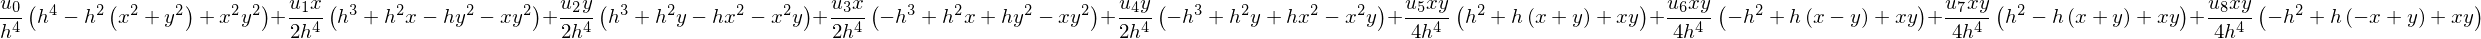

In [7]:
disp[0]

This expression is quite lengthy to manipulate by hand, but we
can obtain the finite difference for the Navier operator
straightforward.

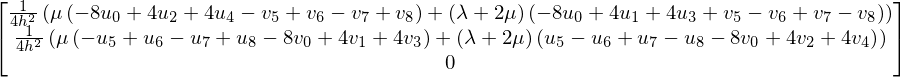

In [8]:
simplify(navier_cauchy(disp, [lamda, mu]).subs({x:0, y:0}))

To impose Neuman boundary conditions we need to compute the stresses.

In [9]:
strain = (sym_grad(disp)).subs({x:0, y:0})
stress = strain_stress(strain, [lamda, mu])

The tractions are the projection of the stress tensor. For a uniform grid
these would be horizontal or vertical.

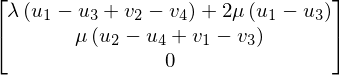

In [10]:
t1 = stress * Matrix([1, 0, 0])
simplify(2*h*t1)

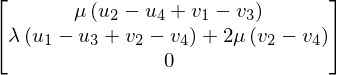

In [11]:
t2 = stress * Matrix([0, 1, 0])
simplify(2*h*t2)

In [12]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()